In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
# Set plotting style and figure size
plt.style.use('seaborn-v0_8-darkgrid')  # or try 'seaborn-v0_8'
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_theme()  # This is the newer way to set seaborn's default theme

In [4]:
# Read the data
df = pd.read_csv('cleaned_combined_state_crime_rates_no_dupes.csv')

In [5]:
# Basic data exploration
def explore_data(df):
    """
    Perform initial exploratory data analysis
    """
    # Basic information
    print("=== Dataset Overview ===")
    print(f"Shape: {df.shape}")
    print("\n=== Data Types ===")
    print(df.dtypes)
    
    # Convert date column to datetime
    df['date'] = pd.to_datetime(df['date'])
    
    # Summary statistics
    print("\n=== Summary Statistics ===")
    print(df.describe())
    
    # Check for missing values
    print("\n=== Missing Values ===")
    print(df.isnull().sum())
    
    # Display sample of data
    print("\n=== First Few Rows ===")
    print(df.head())
    
    return df

In [6]:
explore_data(df)

=== Dataset Overview ===
Shape: (24336, 5)

=== Data Types ===
Unnamed: 0             int64
date                  object
crime_rate           float64
state                 object
crime_rate_filled    float64
dtype: object

=== Summary Statistics ===
         Unnamed: 0                           date    crime_rate  \
count  24336.000000                          24336  24336.000000   
mean   12422.500000  2004-06-16 01:50:46.153846272    292.417118   
min        0.000000            1985-01-01 00:00:00      0.000000   
25%     6211.250000            1994-09-23 12:00:00    195.782500   
50%    12422.500000            2004-06-16 00:00:00    268.815000   
75%    18633.750000            2014-03-08 18:00:00    366.740000   
max    24845.000000            2023-12-01 00:00:00   5914.990000   
std     7175.401631                            NaN    194.674572   

       crime_rate_filled  
count       24336.000000  
mean          292.447145  
min             0.000000  
25%           195.937500  
50

,Unnamed: 0,date,crime_rate,state,crime_rate_filled
0,0,1985-01-01,296.58,Alabama,296.58
1,1,1985-02-01,261.86,Alabama,261.86
2,2,1985-03-01,288.37,Alabama,288.37
3,3,1985-04-01,265.32,Alabama,265.32
4,4,1985-05-01,281.24,Alabama,281.24
...,...,...,...,...,...
24331,8589,2023-08-01,137.89,Kentucky,137.89
24332,8590,2023-09-01,127.35,Kentucky,127.35
24333,8591,2023-10-01,132.57,Kentucky,132.57
24334,8592,2023-11-01,120.65,Kentucky,120.65


In [7]:
# Basic statistics by state
def state_statistics(df):
    """
    Calculate key statistics for each state
    """
    stats = df.groupby('state').agg({
        'crime_rate': ['count', 'mean', 'std', 'min', 'max']
    }).round(2)
    
    print("=== State-wise Statistics ===")
    return stats

In [8]:
# Time-based analysis
def analyze_time_patterns(df):
    """
    Analyze temporal patterns in the data
    """
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    
    # Yearly trends
    yearly_avg = df.groupby('year')['crime_rate'].mean()
    
    plt.figure(figsize=(15, 6))
    yearly_avg.plot()
    plt.title('Average Crime Rate Over Years')
    plt.xlabel('Year')
    plt.ylabel('Average Crime Rate')
    plt.grid(True)
    plt.show()
    
    # Monthly patterns
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=df, x='month', y='crime_rate')
    plt.title('Crime Rate Distribution by Month')
    plt.xlabel('Month')
    plt.ylabel('Crime Rate')
    plt.show()
    
    return df

=== State-wise Statistics ===


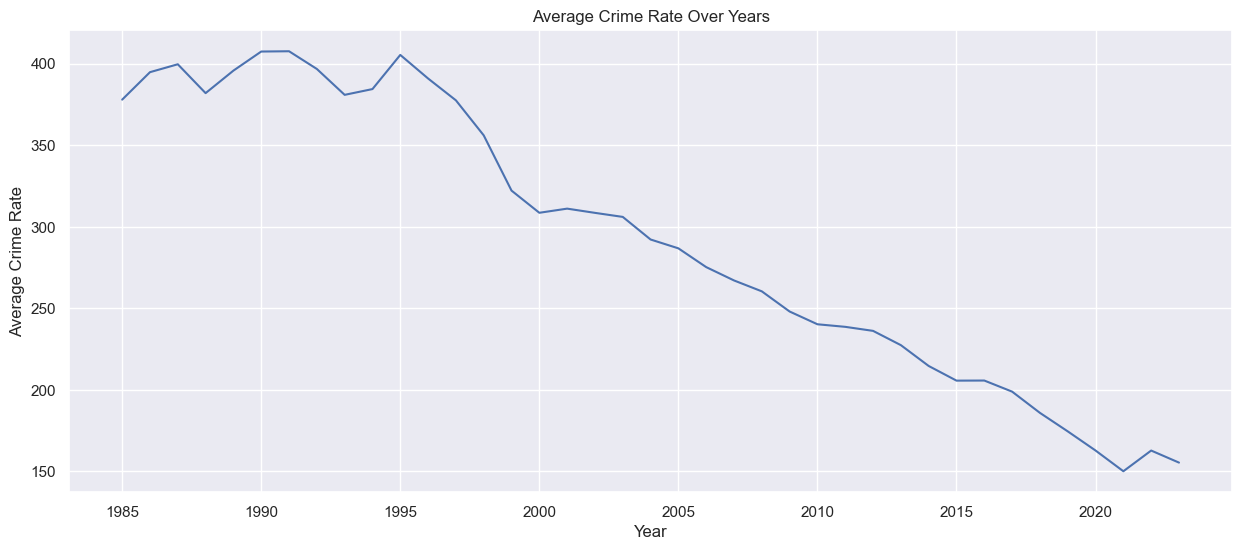

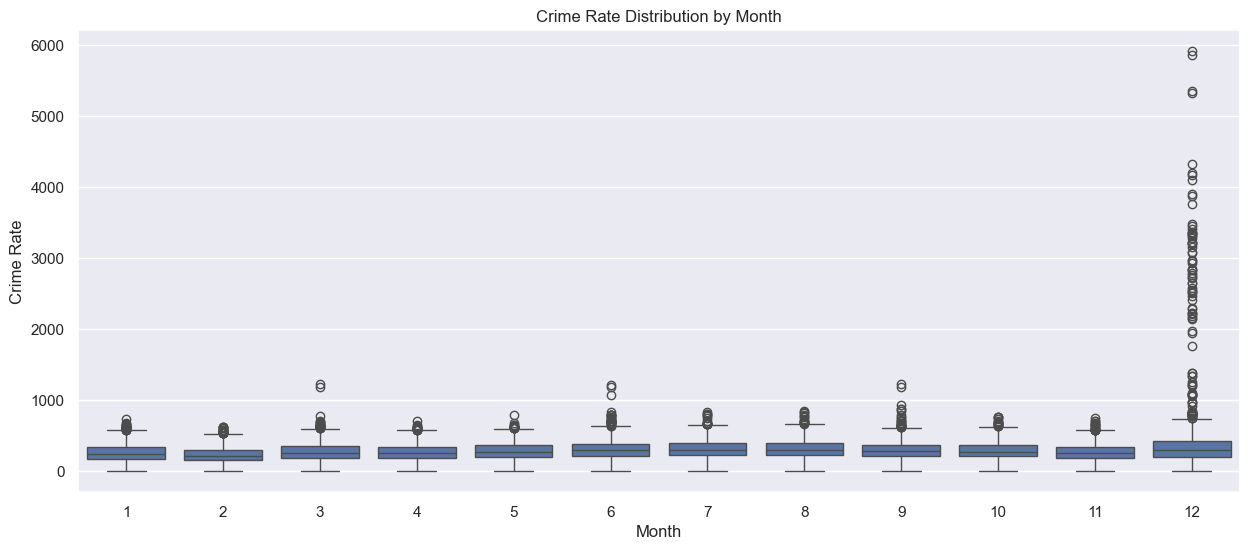

In [10]:
stats = state_statistics(df)
df = analyze_time_patterns(df)

C:\Users\marka\AppData\Local\Temp\ipykernel_15888\2904720730.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


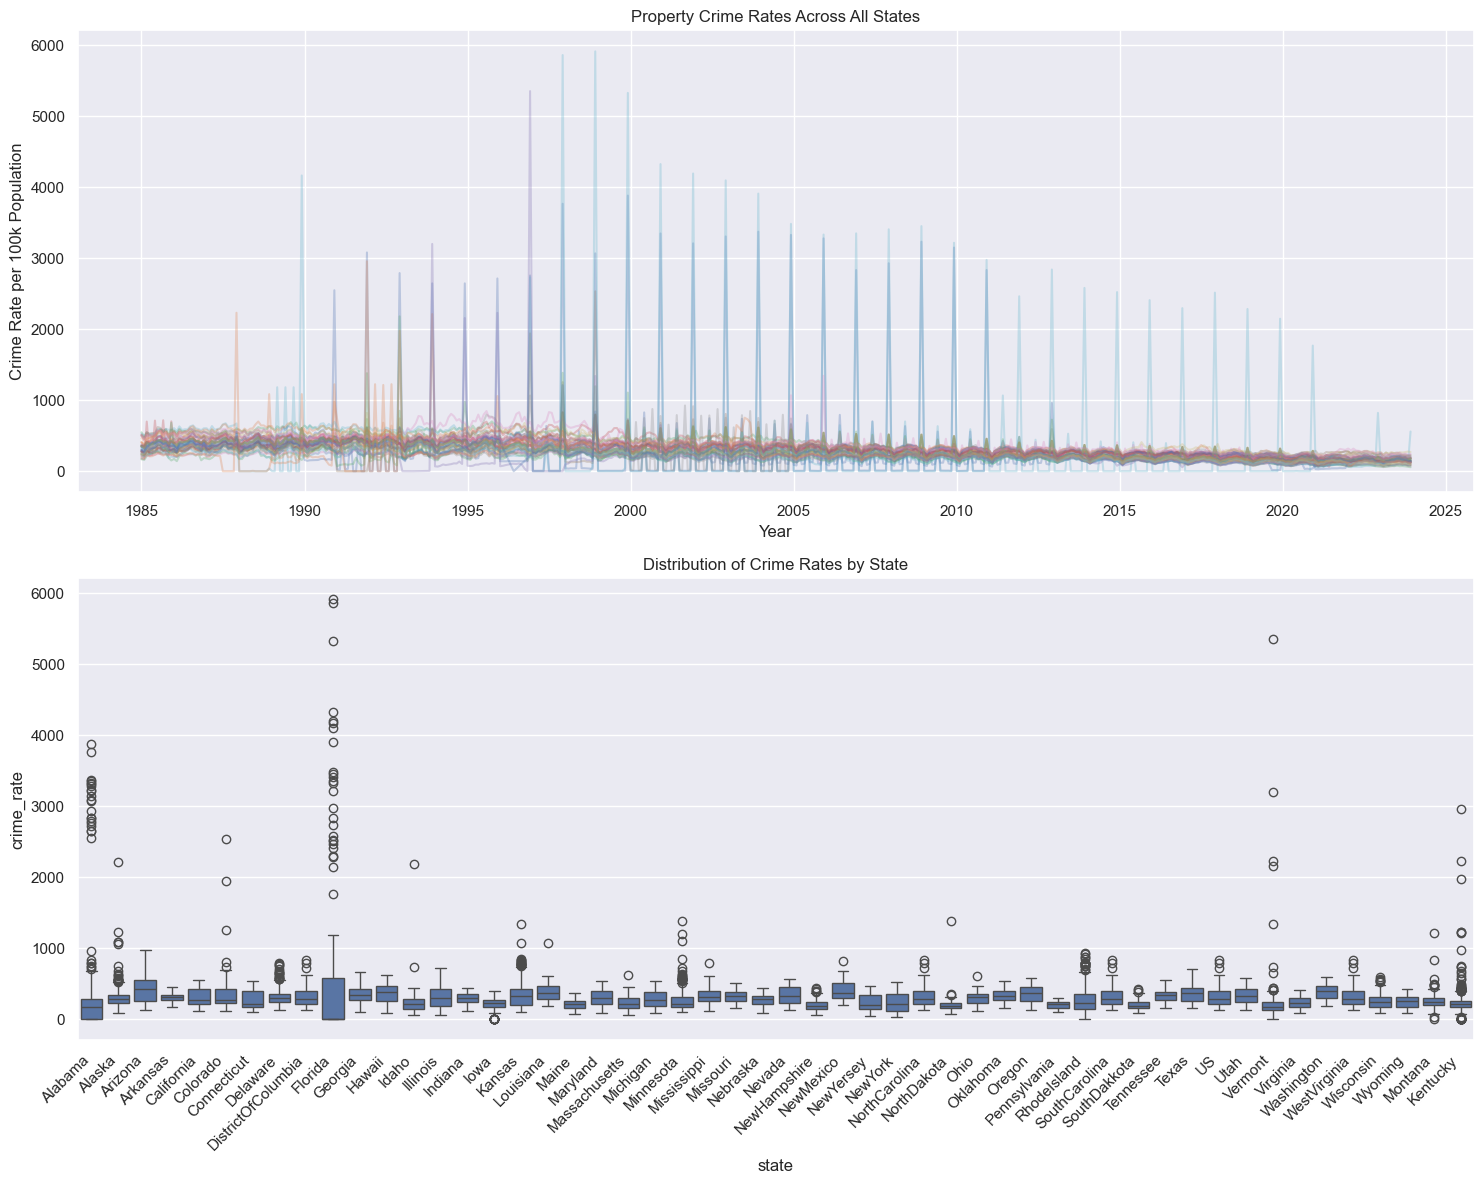

In [11]:
# Initial time series plots
def plot_initial_timeseries(df):
    """
    Create initial time series visualizations
    """
    # Create figure and axis objects with subplots()
    fig, axes = plt.subplots(2, 1, figsize=(15, 12))
    
    # Plot 1: Overall trend for all states
    for state in df['state'].unique():
        state_data = df[df['state'] == state]
        axes[0].plot(state_data['date'], state_data['crime_rate'], alpha=0.3)
    
    axes[0].set_title('Property Crime Rates Across All States')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Crime Rate per 100k Population')
    axes[0].grid(True)
    
    # Plot 2: Box plot of crime rates by state
    sns.boxplot(data=df, x='state', y='crime_rate', ax=axes[1])
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
    axes[1].set_title('Distribution of Crime Rates by State')
    
    plt.tight_layout()
    plt.show()

plot_initial_timeseries(df)
